In [4]:
import os
import pandas as pd

# Define the base path for your dataset files
base_path = '/Users/ashwinibhandari/Desktop/Big_Mart_Sales_files'

# A generic function to load CSV files from a directory based on file names
def load_csv_files(*filenames):
    """
    This function takes any number of filenames, attempts to load them from
    the specified directory, and returns a dictionary of DataFrames.
    """
    dataframes = {}
    
    for filename in filenames:
        file_path = os.path.join(base_path, filename)
        
        if os.path.exists(file_path):
            print(f"Loading file: {file_path}")
            dataframes[filename] = pd.read_csv(file_path)
        else:
            print(f"File not found: {file_path}")
    
    return dataframes

# Load both 'train.csv' and 'test.csv' generically
csv_files = load_csv_files('train.csv', 'test.csv')

# Accessing data
if 'train.csv' in csv_files:
    print("First 5 rows of train.csv:")
    print(csv_files['train.csv'].head())

if 'test.csv' in csv_files:
    print("\nFirst 5 rows of test.csv:")
    print(csv_files['test.csv'].head())


Loading file: /Users/ashwinibhandari/Desktop/Big_Mart_Sales_files/train.csv
Loading file: /Users/ashwinibhandari/Desktop/Big_Mart_Sales_files/test.csv
First 5 rows of train.csv:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0          

In [12]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from datetime import datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


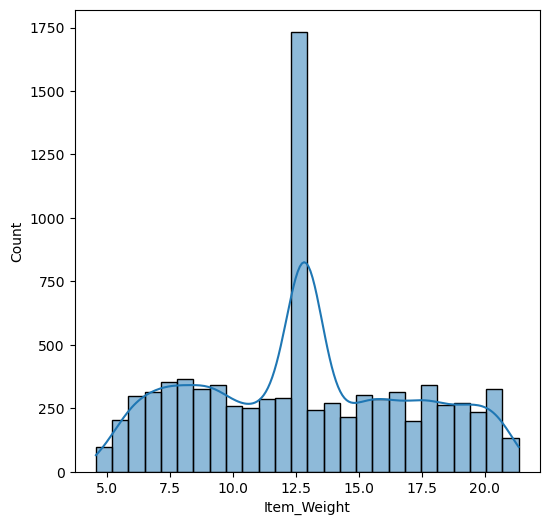

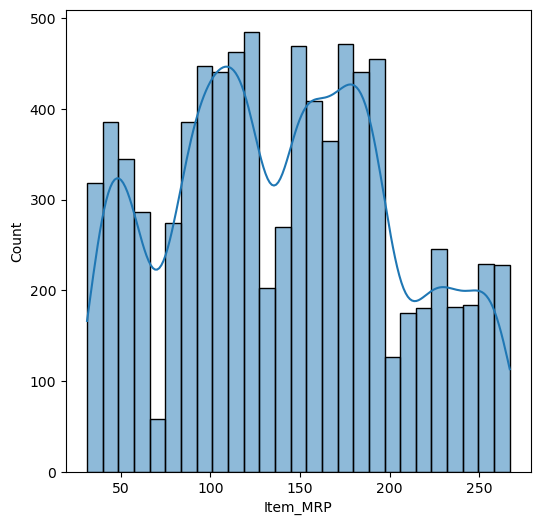

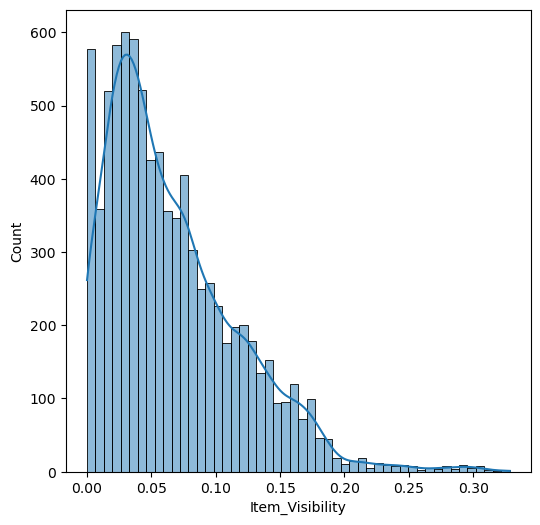

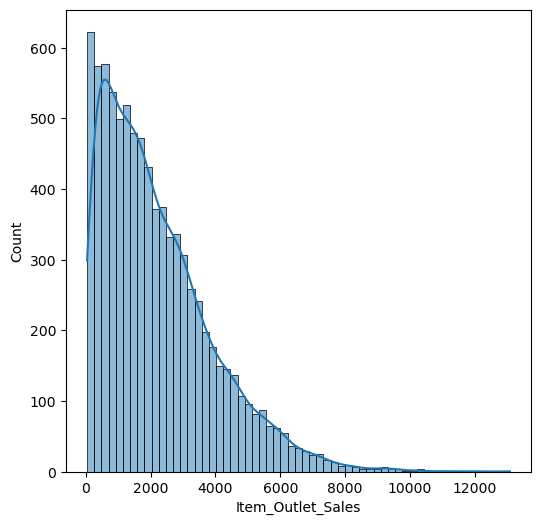

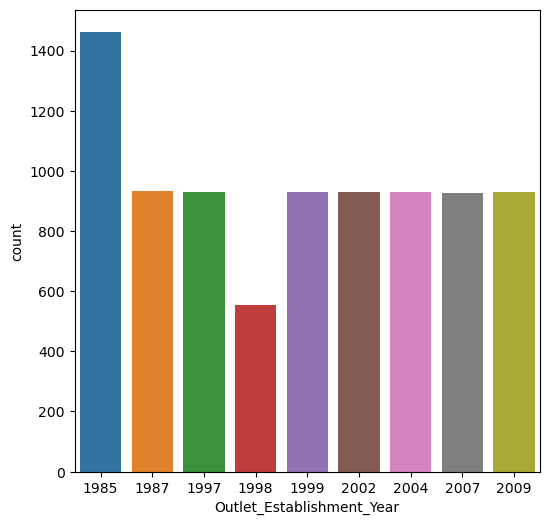

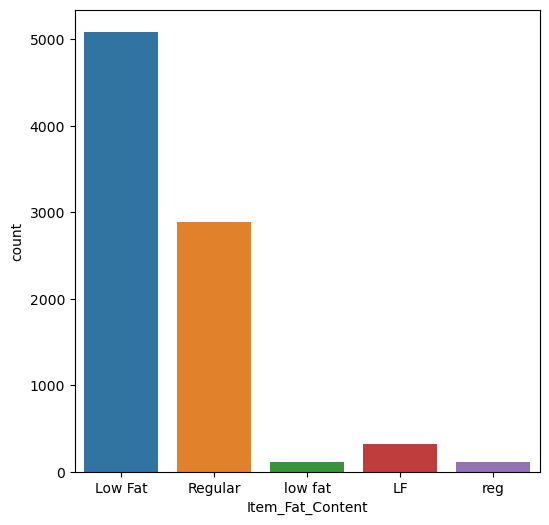

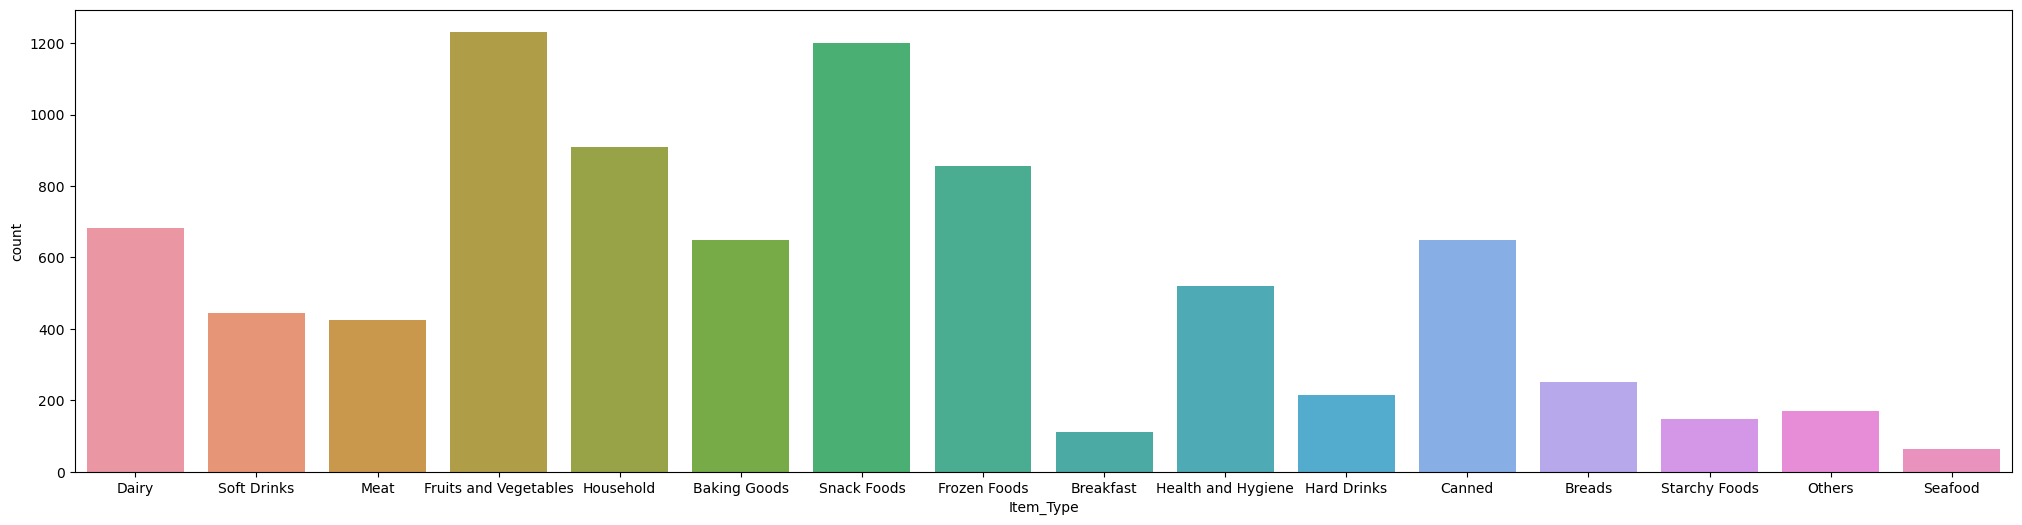

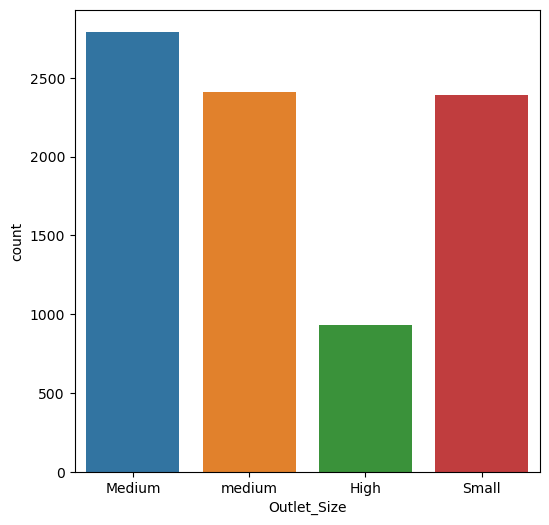

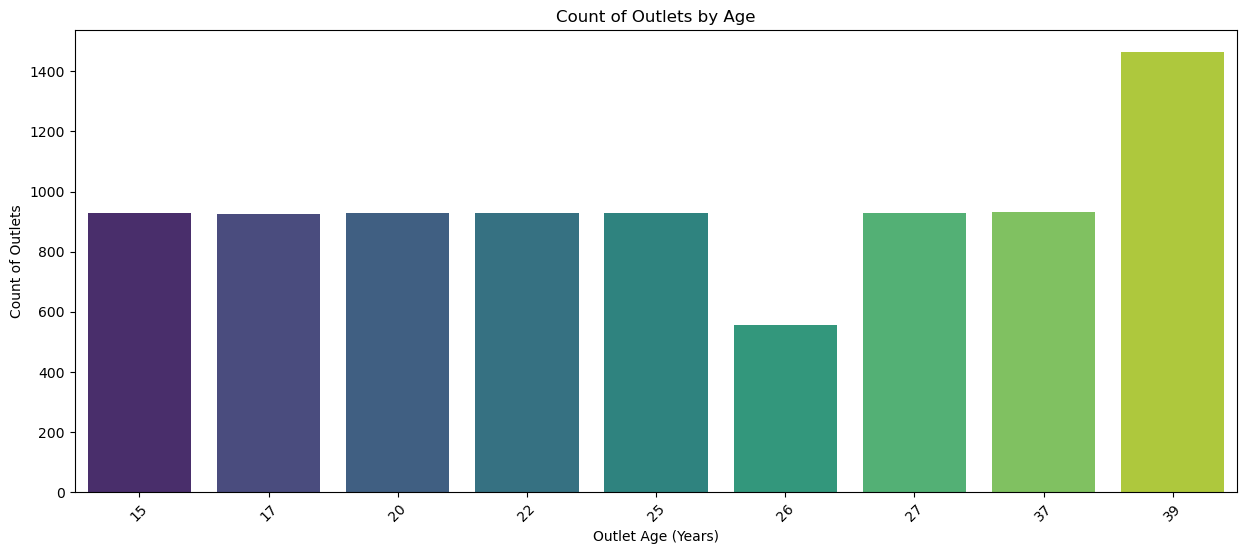

R-squared score from Random Forest: 0.5608367432429477


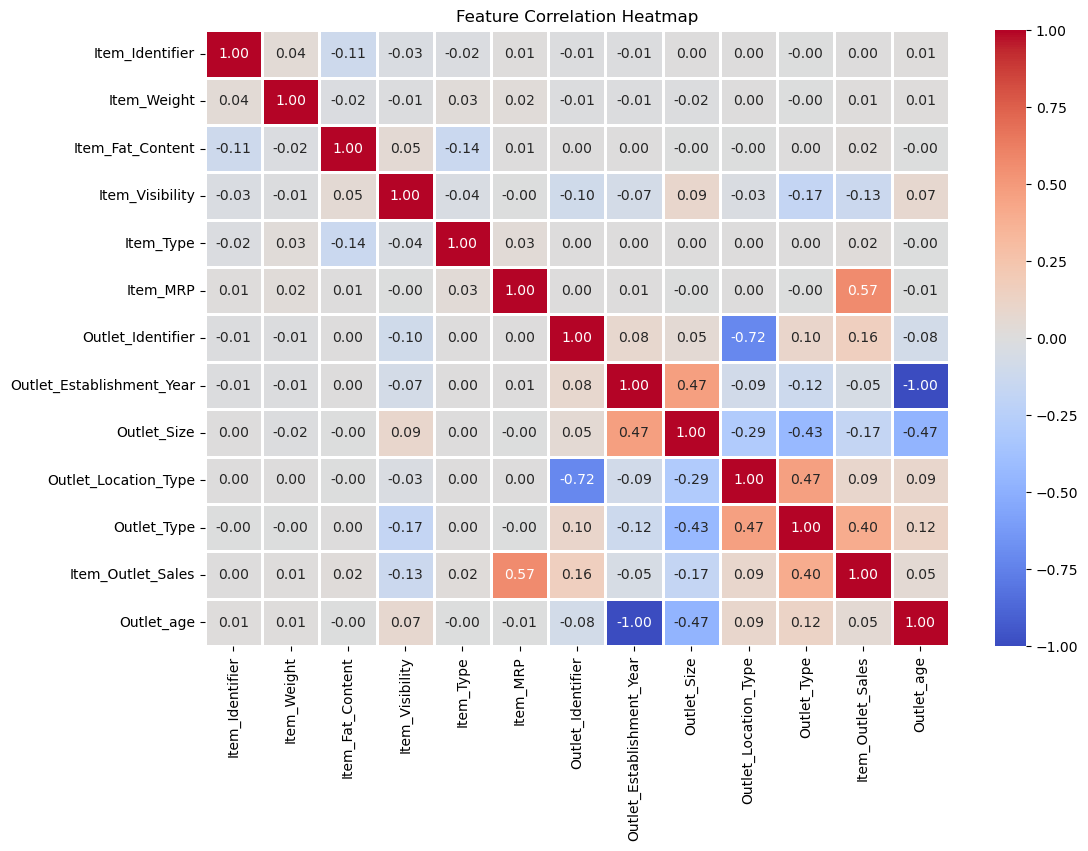

In [13]:
# Load dataset (use your correct path here)
df = pd.read_csv('/Users/ashwinibhandari/Desktop/Big_Mart_Sales_files/train.csv')

# Display basic information about the dataset
df.info()

# Check for missing values and duplicates in the dataset
df.isnull().sum()  # Check for missing values in each column
df.duplicated().sum()  # Check for duplicate rows

# Fill missing values in the 'Item_Weight' column with the column mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

# Fill missing values in the 'Outlet_Size' column with 'medium' (using mode)
df.fillna({"Outlet_Size": "medium"}, inplace=True)

# Verify if there are any more missing values left
df.isnull().sum()

# Visualize the distribution of numerical columns using Seaborn's histplot (replacement for distplot)
plt.figure(figsize=(6,6))
sns.histplot(df['Item_Weight'], kde=True)
plt.show()

plt.figure(figsize=(6,6))
sns.histplot(df['Item_MRP'], kde=True)
plt.show()

plt.figure(figsize=(6,6))
sns.histplot(df['Item_Visibility'], kde=True)
plt.show()

plt.figure(figsize=(6,6))
sns.histplot(df['Item_Outlet_Sales'], kde=True)
plt.show()

# Visualize categorical columns with count plots
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

# Cleaning up the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)


# Encode categorical variables into numeric values using LabelEncoder
encoder = LabelEncoder()

df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

# Prepare the dataset for model training
X = df.drop(columns='Item_Outlet_Sales', axis=1)  # Features (independent variables)
Y = df['Item_Outlet_Sales']  # Target (dependent variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)  # Fit the model on the training data

# Make predictions on the test data
y_pred = rfg.predict(X_test)

# Evaluate the model's performance using the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score from Random Forest:", r2)

# Plot a heatmap to visualize the correlation between different features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title("Feature Correlation Heatmap")
plt.show()

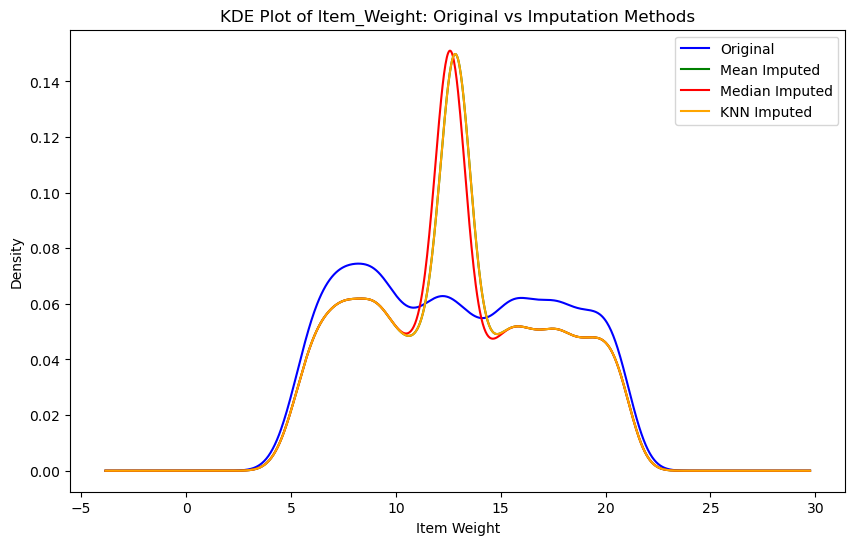

In [8]:
# Import necessary libraries

from sklearn.impute import KNNImputer

# Load the dataset
# Make sure to use the correct path for your 'train.csv' file
df = pd.read_csv('/Users/ashwinibhandari/Desktop/Big_Mart_Sales_files/train.csv')

# Fill missing values with mean and median for comparison
df['Item_Weight_mean'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())  # Filling missing values with mean
df['Item_Weight_median'] = df['Item_Weight'].fillna(df['Item_Weight'].median())  # Filling missing values with median

# Initialize the KNN imputer
knn = KNNImputer(n_neighbors=10, weights="distance")

# Apply KNN imputation to the 'Item_Weight' column
df["knn_imputer"] = knn.fit_transform(df[["Item_Weight"]]).ravel()

# Plotting KDE plots for original, mean-filled, median-filled, and KNN-imputed 'Item_Weight'
plt.figure(figsize=(10, 6))

# Original 'Item_Weight'
df["Item_Weight"].plot(kind="kde", label="Original", color='blue')

# Mean-filled 'Item_Weight'
df["Item_Weight_mean"].plot(kind="kde", label="Mean Imputed", color='green')

# Median-filled 'Item_Weight'
df["Item_Weight_median"].plot(kind="kde", label="Median Imputed", color='red')

# KNN-imputed 'Item_Weight'
df["knn_imputer"].plot(kind="kde", label="KNN Imputed", color='orange')

# Adding titles and labels
plt.title("KDE Plot of Item_Weight: Original vs Imputation Methods")
plt.xlabel('Item Weight')
plt.ylabel('Density')

# Show legend
plt.legend()

# Display the plot
plt.show()


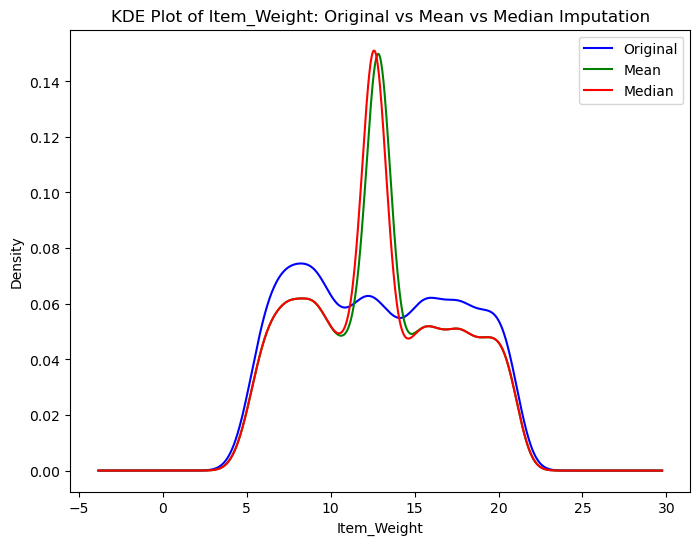

In [9]:
# First, let's create the additional columns with the mean and median of 'Item_Weight'
df['Item_Weight_mean'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())  # Filling missing values with mean
df['Item_Weight_median'] = df['Item_Weight'].fillna(df['Item_Weight'].median())  # Filling missing values with median

# Plotting KDE plots for original, mean-filled, and median-filled 'Item_Weight'
plt.figure(figsize=(8,6))  # Adjust the size of the plot for better visibility

# KDE plot for the original 'Item_Weight' (before filling missing values)
df['Item_Weight'].plot(kind="kde", label="Original", color='blue')

# KDE plot for 'Item_Weight' after filling with mean
df['Item_Weight_mean'].plot(kind="kde", label="Mean", color='green')

# KDE plot for 'Item_Weight' after filling with median
df['Item_Weight_median'].plot(kind="kde", label="Median", color='red')

# Adding a legend to differentiate between the original, mean, and median plots
plt.legend()

# Display the plot
plt.title("KDE Plot of Item_Weight: Original vs Mean vs Median Imputation")
plt.xlabel('Item_Weight')
plt.ylabel('Density')
plt.show()


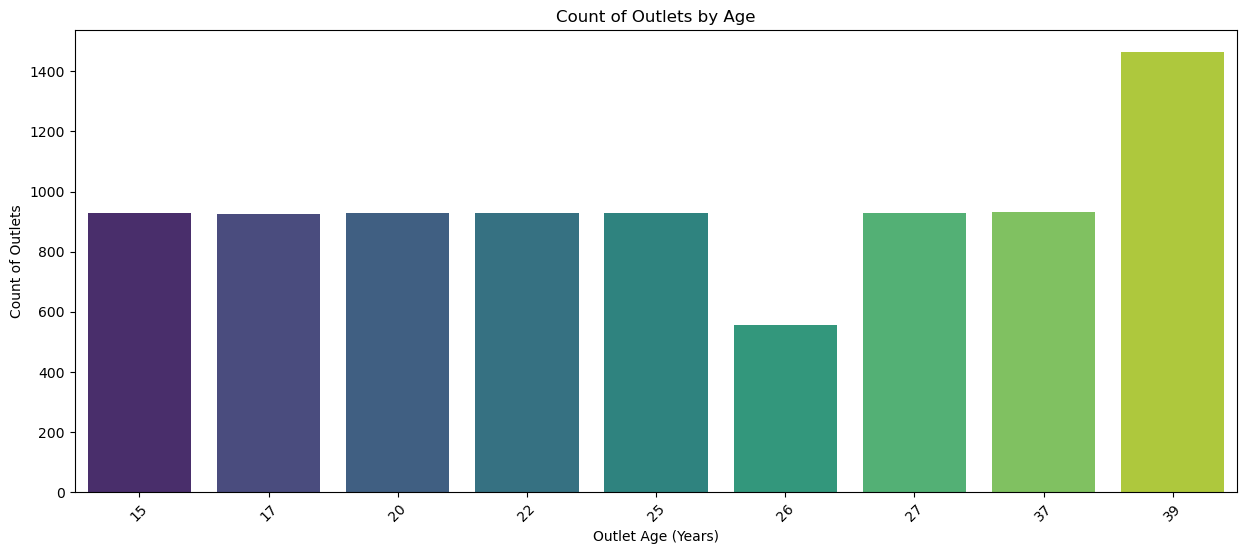

/Users/ashwinibhandari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

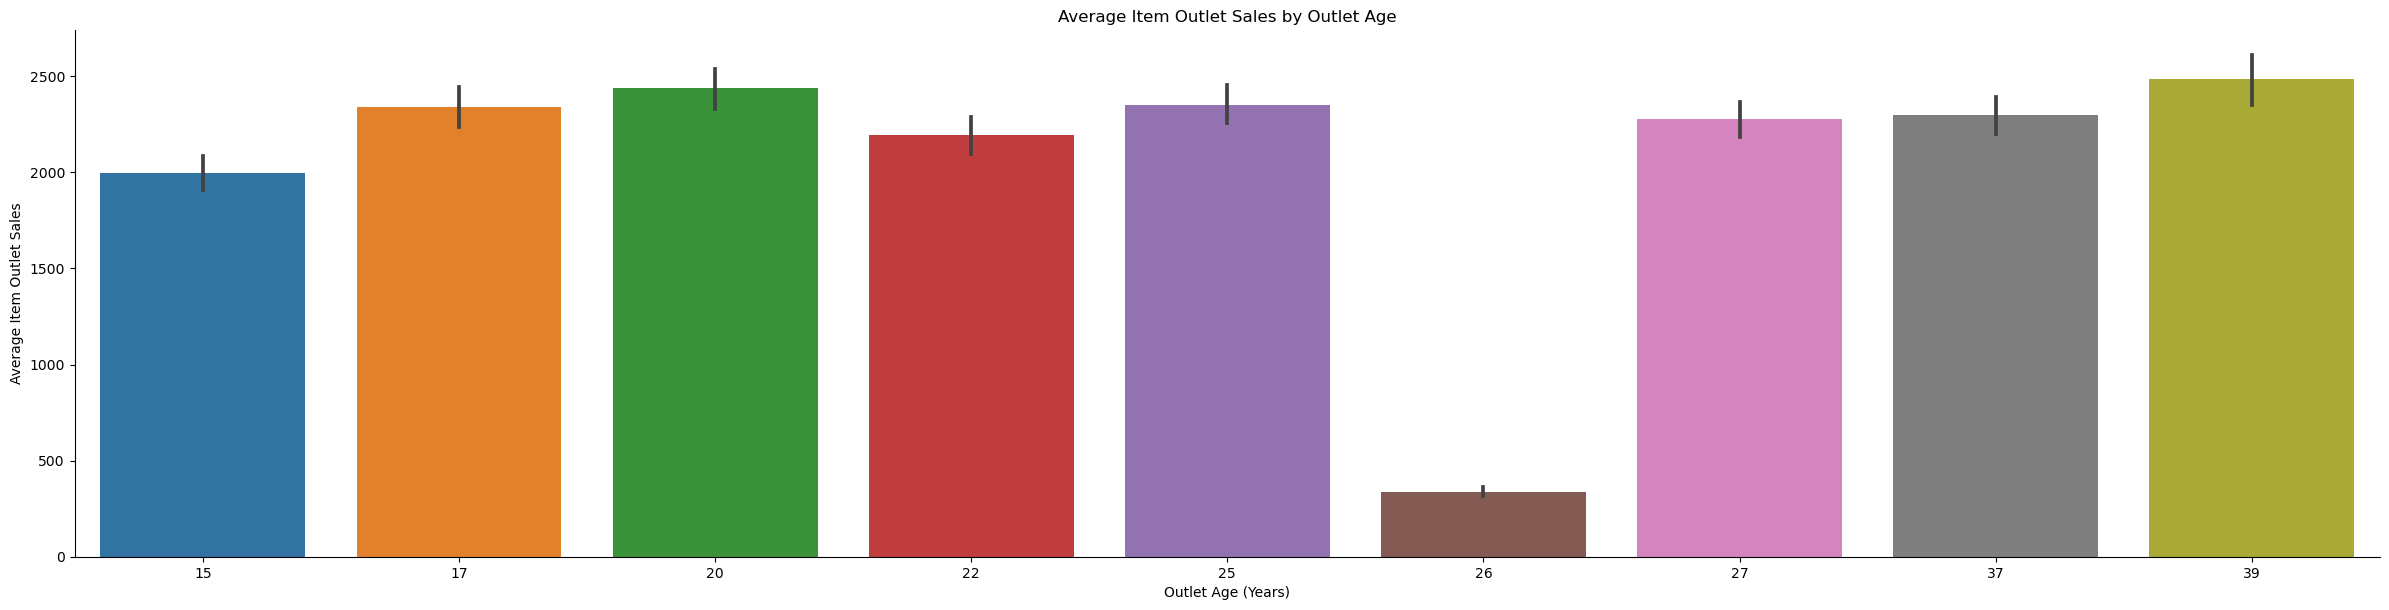

In [16]:
# Calculate the current year
current_year = datetime.now().year

# Create the Outlet_age column
df['Outlet_age'] = current_year - df['Outlet_Establishment_Year']

# Plotting the count of outlets by age
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Outlet_age', palette='viridis')
plt.title('Count of Outlets by Age')
plt.xlabel('Outlet Age (Years)')
plt.ylabel('Count of Outlets')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

# Set the figure size for the plot
plt.figure(figsize=(25, 6))

# Create a bar plot using catplot to show average Item_Outlet_Sales by Outlet_age
sns.catplot(data=df, x="Outlet_age", y="Item_Outlet_Sales", kind="bar", height=6, aspect=4)

# Set titles and labels for better readability
plt.title('Average Item Outlet Sales by Outlet Age')
plt.xlabel('Outlet Age (Years)')
plt.ylabel('Average Item Outlet Sales')

# Show the plot
plt.show()